## Polynomial Regression - Choosing Degree of Polynomial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create different order polynomials
# split poly features into train/test
# fit on train
# predict on test
# store/save the rmse for BOTH train and test
# PLOT the results (error vs poly order)

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales', axis=1)
y = df['sales']

In [6]:
train_rmse_errors = []
test_rmse_errors = []

In [7]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error 

In [8]:
for d in range(1, 10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    train_rmse_errors.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    
    test_pred = model.predict(X_test)
    test_rmse_errors.append(np.sqrt(mean_squared_error(y_test, test_pred)))

There might be a spike sometimes (5.421422348088463), but in theory, if you run the complexity high enough, you should continually get lower and lower errors on the training data set.

In [9]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292233,
 0.4339344356902067,
 0.35170836883993495,
 0.2509342951990972,
 0.1971254009841768,
 5.421422348088463,
 0.1426544837726474,
 0.16675345956185658]

You'll notice that after a while you just start exploding in root mean squared error on a test data set.

In [10]:
test_rmse_errors

[1.5161519375993873,
 0.6646431757269196,
 0.5803286825231453,
 0.5077742623872589,
 2.5758247707699113,
 4.492670773896812,
 1381.4040685804796,
 4449.568027403435,
 95893.02658330933]

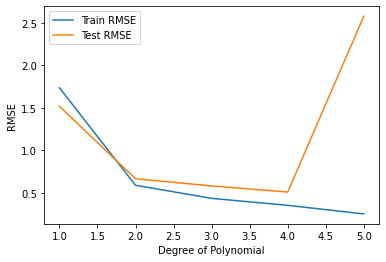

In [11]:
plt.plot(range(1, 6), train_rmse_errors[:5], label='Train RMSE')
plt.plot(range(1, 6), test_rmse_errors[:5], label='Test RMSE')

plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.legend()

But going up to four, even if the performance here is very good, it is probably not necessary to take it as you are kind of at the region of risk to immediately explode onto your test root mean squared error.
<br>So I'd highly recommend that in this case we choose something like a second degree or third degree,
given the data set and given the context of what we're actually working with.

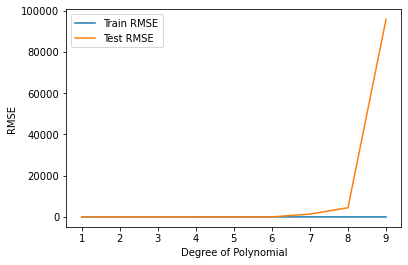

In [12]:
plt.plot(range(1, 10), train_rmse_errors, label='Train RMSE')
plt.plot(range(1, 10), test_rmse_errors, label='Test RMSE')

plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.legend()

---
---

## Polynomial Regression - Model Deployment

Let's assume that we're going to choose a third degree level of polynomial.

I want to create a finalized polynomial converter that I can save it.

In [14]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [16]:
full_converted_X = final_poly_converter.fit_transform(X)

In [17]:
full_converted_X

array([[2.30100000e+02, 3.78000000e+01, 6.92000000e+01, ...,
        9.88757280e+04, 1.81010592e+05, 3.31373888e+05],
       [4.45000000e+01, 3.93000000e+01, 4.51000000e+01, ...,
        6.96564990e+04, 7.99365930e+04, 9.17338510e+04],
       [1.72000000e+01, 4.59000000e+01, 6.93000000e+01, ...,
        1.46001933e+05, 2.20434291e+05, 3.32812557e+05],
       ...,
       [1.77000000e+02, 9.30000000e+00, 6.40000000e+00, ...,
        5.53536000e+02, 3.80928000e+02, 2.62144000e+02],
       [2.83600000e+02, 4.20000000e+01, 6.62000000e+01, ...,
        1.16776800e+05, 1.84062480e+05, 2.90117528e+05],
       [2.32100000e+02, 8.60000000e+00, 8.70000000e+00, ...,
        6.43452000e+02, 6.50934000e+02, 6.58503000e+02]])

In [18]:
full_converted_X.shape

(200, 19)

In [19]:
final_model = LinearRegression()

In [20]:
final_model.fit(full_converted_X, y)

LinearRegression()

In [21]:
from joblib import dump, load

In [22]:
dump(final_model, 'final_poly_model.joblib')

# And recall, you can also pass in a full file location if you want to save it somewhere else on your computer.

['final_poly_model.joblib']

In [23]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [24]:
loaded_converter = load('final_converter.joblib')

In [25]:
loaded_model = load('final_poly_model.joblib')

In [26]:
campaign = [[149, 22, 12]]

In [29]:
transformed_campaign = loaded_converter.transform(campaign)
transformed_campaign

# not .fit_transform() as it's already fitted

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [32]:
loaded_converter.transform(campaign).shape

(1, 19)

In [33]:
loaded_model.predict(transformed_campaign)

array([14.64501014])